In [1]:
# 20 Apr 2018
#
# plot the PV snapshots

from pydra_misc import read_qq, layers_to_modes
from pydra_analysis import *
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import rfft, irfft
from copy import deepcopy

from casl import parameters, spectral, constants

plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["mathtext.rm"] = "serif"
plt.rcParams["image.cmap"] = "RdBu_r" # "*_r" is reverse of standard colour
plt.rcParams["axes.formatter.limits"] = [-4, 4]

In [2]:
kt = 650

data_dir = "/home/julian/data/hydra_data/jet/nx128ny64hb0.50kd20.0bdpi0.8w0.50r001/"
#data_dir = "/home/mak/data/hydra_data/jet/nx128ny64hb0.50kd20.0bdpi0.8w0.50r001/"

t_now, qq = read_qq(data_dir, parameters.nx, parameters.ny, kt, num_frame = True)

# swap axis to have the indexing consistent with the Fortran code main_invert
qq = np.swapaxes(qq, 0, 1)

# no topography
fhb = np.zeros((parameters.ny + 1, parameters.nx))

x_vec = np.linspace(0, parameters.ellx, parameters.nx, endpoint = False)
y_vec = np.linspace(-parameters.elly / 2, parameters.elly / 2, parameters.ny + 1)

number of frames found = 751 


In [2]:
# plot the PV field snapshot of layers and modes

q_bt, q_bc = layers_to_modes(qq[:, :, 0], qq[:, :, 1], constants)

fig = plt.figure(figsize=(10, 8))

ax1 = plt.subplot(2, 2, 1)
plt.contourf(x_vec, y_vec, qq[:, :, 0], 31, cmap = "RdBu_r")
plt.title(r"$q_1 (t = %g)$" % t_now)

ax3 = plt.subplot(2, 2, 3)
plt.contourf(x_vec, y_vec, qq[:, :, 1], 31, cmap = "RdBu_r")
plt.title(r"$q_2 (t = %g)$" % t_now)

ax2 = plt.subplot(2, 2, 2)
plt.contourf(x_vec, y_vec, q_bt, 31, cmap = "RdBu_r")
plt.title(r"$q_{bt} (t = %g)$" % t_now)

ax4 = plt.subplot(2, 2, 4)
plt.contourf(x_vec, y_vec, q_bc, 31, cmap = "RdBu_r")
plt.title(r"$q_{bc} (t = %g)$" % t_now)


NameError: name 'qq' is not defined

Text(0.5,1,'$\\overline{q}_{bc}^x (t = 650)$')

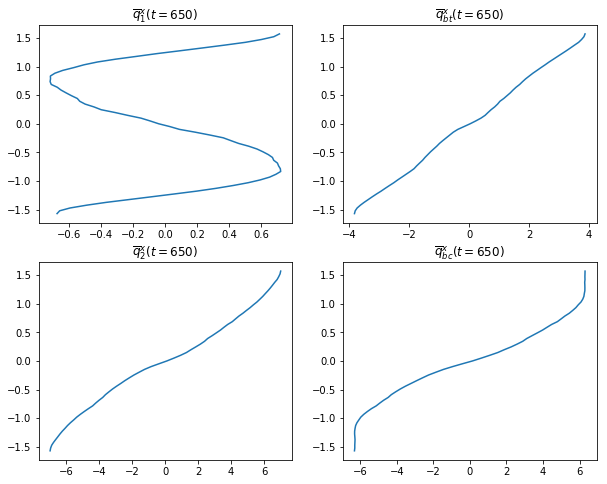

In [4]:
# plot some averages

uu, vv, pp = spectral.main_invert(qq, fhb)

fig = plt.figure(figsize=(10, 8))

ax1 = plt.subplot(2, 2, 1)
plt.plot(zonal_ave(qq[:, :, 0]), y_vec) # x-average, uniform grid so just mean it
plt.title(r"$\overline{q}_1^x (t = %g)$" % t_now)

ax3 = plt.subplot(2, 2, 3)
plt.plot(zonal_ave(qq[:, :, 1]), y_vec)
plt.title(r"$\overline{q}_2^x (t = %g)$" % t_now)

ax2 = plt.subplot(2, 2, 2)
plt.plot(zonal_ave(q_bt), y_vec)
plt.title(r"$\overline{q}_{bt}^x (t = %g)$" % t_now)

ax4 = plt.subplot(2, 2, 4)
plt.plot(zonal_ave(q_bc), y_vec)
plt.title(r"$\overline{q}_{bc}^x (t = %g)$" % t_now)

Text(0.5,1,'$\\overline{u}_{bc}^x (t = 650)$')

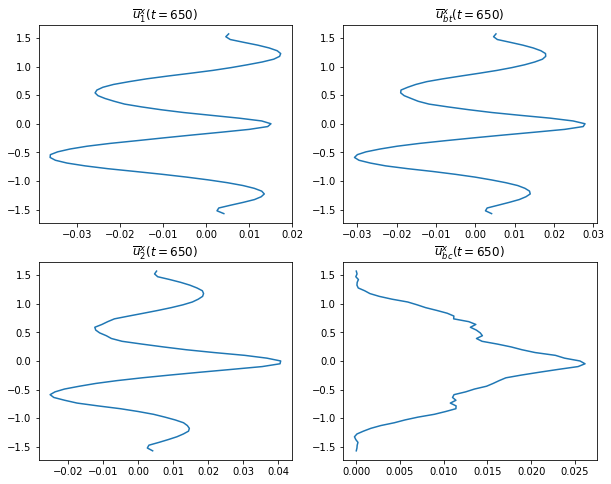

In [5]:
# conversion of velocity into modes

u_bt = constants.vec11 * uu[:, :, 0] + constants.vec12 * uu[:, :, 1]
u_bc = constants.vec21 * uu[:, :, 0] + constants.vec22 * uu[:, :, 1]

fig = plt.figure(figsize=(10, 8))

ax1 = plt.subplot(2, 2, 1)
plt.plot(zonal_ave(uu[:, :, 0]), y_vec) # x-average, uniform grid so just mean it
plt.title(r"$\overline{u}_1^x (t = %g)$" % t_now)

ax3 = plt.subplot(2, 2, 3)
plt.plot(zonal_ave(uu[:, :, 1]), y_vec)
plt.title(r"$\overline{u}_2^x (t = %g)$" % t_now)

ax2 = plt.subplot(2, 2, 2)
plt.plot(zonal_ave(u_bt), y_vec)
plt.title(r"$\overline{u}_{bt}^x (t = %g)$" % t_now)

ax4 = plt.subplot(2, 2, 4)
plt.plot(zonal_ave(u_bc), y_vec)
plt.title(r"$\overline{u}_{bc}^x (t = %g)$" % t_now)

Text(0.5,1,'$\\overline{EKE}_{2}^x (t = 650)$')

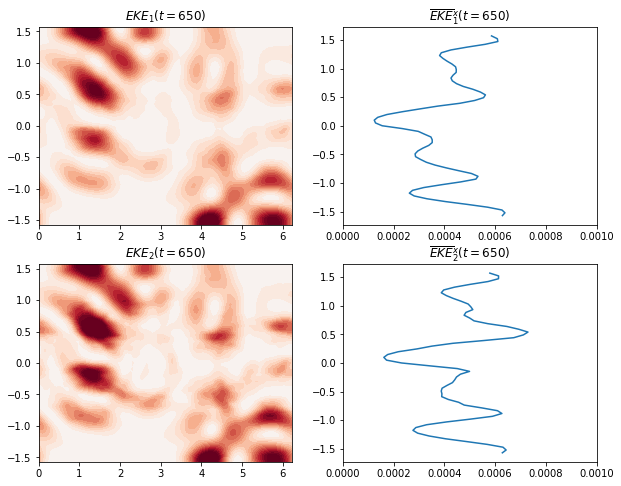

In [6]:
# plot the eke

eke_1 = zonal_eke(uu[:, :, 0], vv[:, :, 0])
eke_2 = zonal_eke(uu[:, :, 1], vv[:, :, 1])

lim_max = 0.002
level_vec = np.linspace(-lim_max, lim_max, 31)

fig = plt.figure(figsize=(10, 8))

ax1 = plt.subplot(2, 2, 1)
plt.contourf(x_vec, y_vec, eke_1, level_vec, 
             extend = "max", cmap = "RdBu_r")
plt.title(r"$EKE_1 (t = %g)$" % t_now)

ax3 = plt.subplot(2, 2, 3)
plt.contourf(x_vec, y_vec, eke_2, level_vec, 
             extend = "max", cmap = "RdBu_r")
plt.title(r"$EKE_2 (t = %g)$" % t_now)

ax2 = plt.subplot(2, 2, 2)
plt.plot(zonal_ave(eke_1), y_vec)
plt.xlim([0, lim_max / 2])
plt.title(r"$\overline{EKE}_{1}^x (t = %g)$" % t_now)

ax4 = plt.subplot(2, 2, 4)
plt.plot(zonal_ave(eke_2), y_vec)
plt.xlim([0, lim_max / 2])
plt.title(r"$\overline{EKE}_{2}^x (t = %g)$" % t_now)

t = 500...
t = 550...
t = 600...
t = 650...
t = 700...
t = 750...


Text(0.5,0,'$t$')

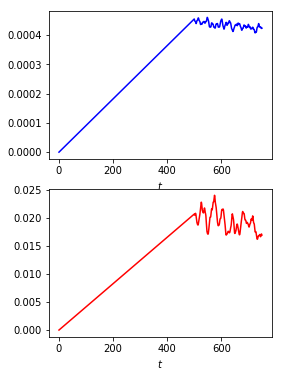

In [7]:
eke_domavg = np.zeros(751)
ens_domavg = np.zeros(751)
t_vec = np.zeros(751)
for kt in range(500, 751):
    if kt % 50 == 0:
        print("t = %g..." % kt)
    t_vec[kt], qq = read_qq(data_dir, parameters.nx, parameters.ny, kt)
    # swap axis to have the indexing consistent with the Fortran code main_invert
    qq = np.swapaxes(qq, 0, 1)
    uu, vv, pp = spectral.main_invert(qq, fhb)
    eke_domavg[kt] = zonal_eke_int(uu[:, :, 0], vv[:, :, 0], uu[:, :, 1], vv[:, :, 1], parameters)
    ens_domavg[kt] = zonal_ens_int(qq[:, :, 0], qq[:, :, 1], parameters)

fig = plt.figure(figsize=(4, 6))

ax1 = plt.subplot(2, 1, 1)
plt.plot(t_vec, eke_domavg, 'b')
plt.xlabel(r'$t$')

ax2 = plt.subplot(2, 1, 2)
plt.plot(t_vec, ens_domavg, 'r')
plt.xlabel(r'$t$')


Text(0.5,1,'$q_1(k \\leq 13) (t = 650)$')

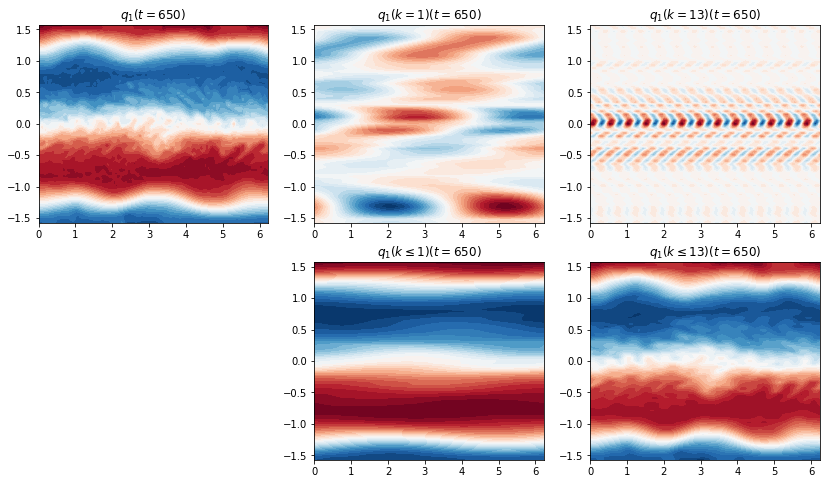

In [8]:
fig = plt.figure(figsize=(14, 8))

ax1 = plt.subplot(2, 3, 1)
plt.contourf(x_vec, y_vec, qq[:, :, 0], 31, cmap = "RdBu_r")
plt.title(r"$q_1 (t = %g)$" % t_now)

mode_keep = 1
ax2 = plt.subplot(2, 3, 2)
plt.contourf(x_vec, y_vec, zonal_mode_extract(qq[:, :, 0], mode_keep),
             31, cmap = "RdBu_r")
plt.title(r"$q_1(k = %g) (t = %g)$" % (mode_keep, t_now))

mode_keep = 13
ax3 = plt.subplot(2, 3, 3)
plt.contourf(x_vec, y_vec, zonal_mode_extract(qq[:, :, 0], mode_keep),
             31, cmap = "RdBu_r")
plt.title(r"$q_1(k = %g) (t = %g)$" % (mode_keep, t_now))

mode_keep = 1
ax2 = plt.subplot(2, 3, 5)
plt.contourf(x_vec, y_vec, zonal_mode_extract(qq[:, :, 0], mode_keep, low_pass = True),
             31, cmap = "RdBu_r")
plt.title(r"$q_1(k \leq %g) (t = %g)$" % (mode_keep, t_now))

mode_keep = 13
ax3 = plt.subplot(2, 3, 6)
plt.contourf(x_vec, y_vec, zonal_mode_extract(qq[:, :, 0], mode_keep, low_pass = True),
             31, cmap = "RdBu_r")
plt.title(r"$q_1(k \leq %g) (t = %g)$" % (mode_keep, t_now))

Text(0.5,1,'only mode 5')

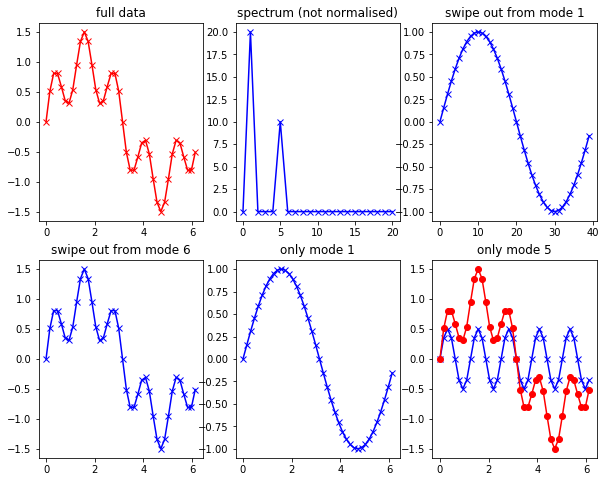

In [9]:
# fft testing

x = np.linspace(0, 2 * np.pi, 40, endpoint = False) # for the FFT
f = np.sin(x) + 0.5 * np.sin(5 * x)
fh = rfft(f)

fig = plt.figure(figsize=(10, 8))
# real space
plt.subplot(2, 3, 1)
plt.plot(x, f, 'rx-')
plt.title(r'full data')

# full spectrum
plt.subplot(2, 3, 2)
plt.plot(np.abs(fh), 'b-x')
plt.title(r'spectrum (not normalised)')

# filter out a whole bunch of modes stuff

fh_1 = deepcopy(fh)
mode_keep = 1
fh_1[mode_keep+1::] = 0 # swipe out all modes from something to the end
plt.subplot(2, 3, 3)
plt.plot(irfft(fh_1), 'b-x')
plt.title(r'swipe out from mode %i' % mode_keep)

# filter out a whole bunch of modes stuff
fh_2 = deepcopy(fh)
mode_keep = 6
fh_1[mode_keep+1::] = 0 # swipe out all modes from something to the end
plt.subplot(2, 3, 4)
plt.plot(x, irfft(fh_2), 'b-x')
plt.title(r'swipe out from mode %i' % mode_keep)

# only plot one mode
fh_3 = deepcopy(fh)
mode_keep = 1
fh_3[mode_keep+1::] = 0
fh_3[0:mode_keep] = 0
plt.subplot(2, 3, 5)
plt.plot(x, irfft(fh_3), 'b-x')
plt.title(r'only mode %i' % mode_keep)

# only plot one mode
fh_4 = deepcopy(fh)
mode_keep = 5
fh_4[mode_keep+1::] = 0
fh_4[0:mode_keep] = 0
plt.subplot(2, 3, 6)
plt.plot(x, irfft(fh_4), 'b-x')
plt.plot(x, irfft(fh_3) + irfft(fh_4), 'r-o')
plt.title(r'only mode %i' % mode_keep)

In [10]:
qq.shape

(65, 128, 2)